This notebook contains a majority of the analysis and feature engineering I performed on the data.

In [ ]:
from google.colab import drive
# Mount Google Drive to access files stored there
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Data preprocessing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import KFold, RandomizedSearchCV

# Algorithms for model training & testing
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
!pip install lightgbm
from lightgbm import LGBMRegressor
import lightgbm as lgb

# Data splitting and testing modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Import data:
train_data = pd.read_csv("/content/drive/MyDrive/Colab_notebooks/train.csv")
test_data_n = pd.read_csv("/content/drive/MyDrive/Colab_notebooks/test.csv")

In [ ]:
train_data = train_data.drop(["id"], axis=1)
test_data = test_data_n.drop(["id"], axis=1)

In [ ]:
display(train_data.head())
display(test_data.head())

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


In [ ]:
display(train_data.info())
display(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     183450 non-null  object
 5   engine        188533 non-null  object
 6   transmission  188533 non-null  object
 7   ext_col       188533 non-null  object
 8   int_col       188533 non-null  object
 9   accident      186081 non-null  object
 10  clean_title   167114 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 17.3+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         125690 non-null  object
 1   model         125690 non-null  object
 2   model_year    125690 non-null  int64 
 3   milage        125690 non-null  int64 
 4   fuel_type     122307 non-null  object
 5   engine        125690 non-null  object
 6   transmission  125690 non-null  object
 7   ext_col       125690 non-null  object
 8   int_col       125690 non-null  object
 9   accident      124058 non-null  object
 10  clean_title   111451 non-null  object
dtypes: int64(2), object(9)
memory usage: 10.5+ MB


None

In [ ]:
train_data.shape, test_data.shape

((188533, 12), (125690, 11))

In [ ]:
# get the missing values in the train and test data
null_train = train_data.isnull().sum()
null_test = test_data.isnull().sum()

display(null_train[null_train > 0])
display(null_test[null_test > 0])

,0
fuel_type,5083
accident,2452
clean_title,21419


,0
fuel_type,3383
accident,1632
clean_title,14239


In [ ]:
display(train_data['fuel_type'].unique())
display(test_data['fuel_type'].unique())

display(train_data['accident'].unique())
display(test_data['accident'].unique())

display(train_data['clean_title'].unique())
display(test_data['clean_title'].unique())

array(['Gasoline', 'E85 Flex Fuel', nan, 'Hybrid', 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

array(['Gasoline', 'Hybrid', 'Diesel', 'E85 Flex Fuel', nan,
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

array(['None reported', 'At least 1 accident or damage reported', nan],
      dtype=object)

array(['None reported', 'At least 1 accident or damage reported', nan],
      dtype=object)

array(['Yes', nan], dtype=object)

array(['Yes', nan], dtype=object)

In [ ]:
train_data.columns, test_data.columns

(Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
        'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
        'price'],
       dtype='object'),
 Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
        'transmission', 'ext_col', 'int_col', 'accident', 'clean_title'],
       dtype='object'))

The plot below looks interesting, but i did not attempt to build a luxury brand feature

/tmp/ipython-input-2634893410.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='brand', y='price', data=train_data[:50000], errorbar=None, palette='viridis')


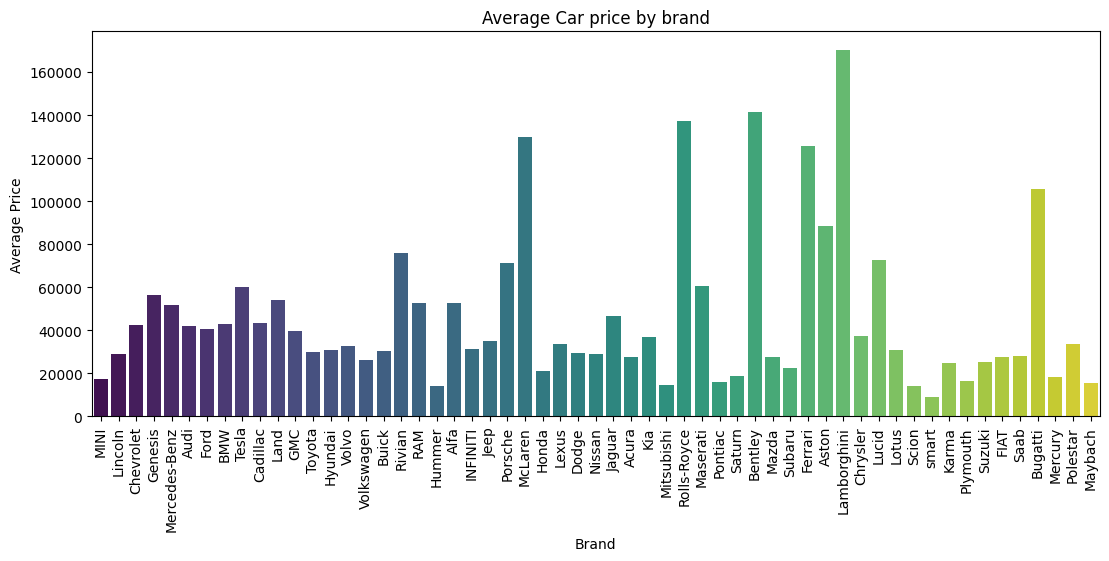

In [ ]:
plt.figure(figsize=(13, 5))
sns.barplot(x='brand', y='price', data=train_data[:50000], errorbar=None, palette='viridis')
plt.title("Average Car price by brand")
plt.xlabel("Brand")
plt.ylabel("Average Price")
plt.xticks(rotation=90)
plt.show()

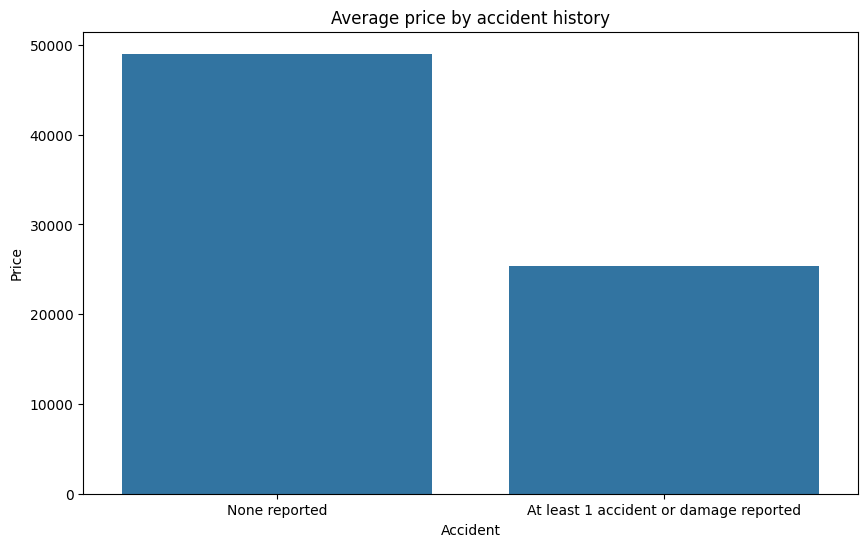

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=train_data, x='accident', y='price', errorbar=None)
plt.title("Average price by accident history")
plt.xlabel('Accident')
plt.ylabel('Price')
plt.show()

Text(0.5, 1.0, 'Counts of fuel type')

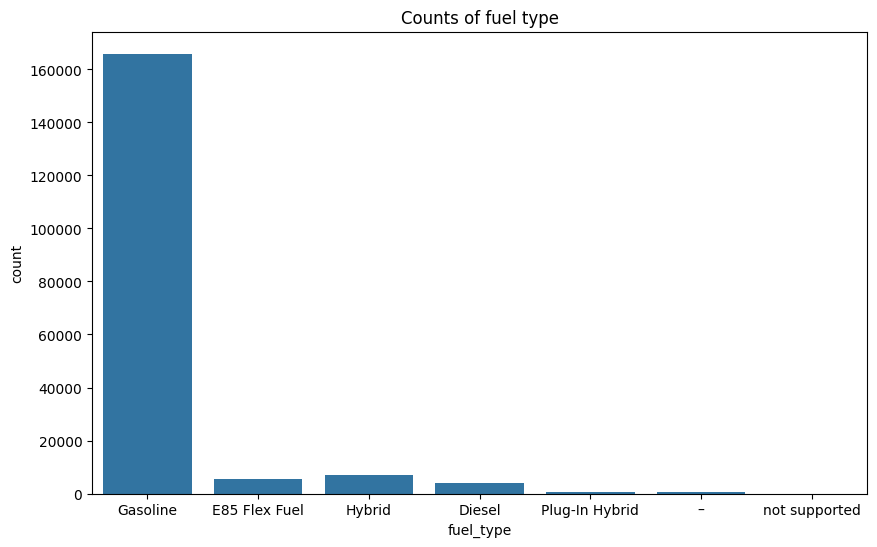

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='fuel_type')
plt.title('Counts of fuel type')

In [ ]:
num_cols = [col for col in train_data.columns if train_data[col].dtype in ['int64', 'float64']]
cat_cols = [col for col in train_data.columns if train_data[col].dtype in ['object']]

print("Num Cols: ", num_cols)
print("Cat Cols: ", cat_cols)

Num Cols:  ['model_year', 'milage', 'price']
Cat Cols:  ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']


In [ ]:
unique_val = {col: train_data[col].nunique() for col in cat_cols}
print("Columns with unique values in the train data:")
for col, count in unique_val.items():
    print(f"{col}: {count} unique values")

Columns with unique values in the train data:
brand: 57 unique values
model: 1897 unique values
fuel_type: 7 unique values
engine: 1117 unique values
transmission: 52 unique values
ext_col: 319 unique values
int_col: 156 unique values
accident: 2 unique values
clean_title: 1 unique values


In [ ]:
unique_val = {col: test_data[col].nunique() for col in cat_cols}
print("Columns with unique values in the test data:")
for col, count in unique_val.items():
    print(f"{col}: {count} unique values")

Columns with unique values in the test data:
brand: 55 unique values
model: 1891 unique values
fuel_type: 7 unique values
engine: 1117 unique values
transmission: 52 unique values
ext_col: 317 unique values
int_col: 156 unique values
accident: 2 unique values
clean_title: 1 unique values


In [ ]:
brand_unique_tr = train_data['brand'].unique()
brand_unique_te = test_data['brand'].unique()
ext_unique = []

for col in brand_unique_tr:
    if col in brand_unique_te:
        continue
    else:
        ext_unique.append(col)
print(ext_unique)

# Select rows in train_data where the 'brand' is in ext_unique
train_data_ext_brands = train_data[train_data['brand'].isin(ext_unique)]
display(train_data_ext_brands)

['smart', 'Polestar']


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
3286,smart,ForTwo Pure,2008,156875,NaN,70.0HP 1.0L 3 Cylinder Engine Gasoline Fuel,2-Speed A/T,Black,Gray,At least 1 accident or damage reported,Yes,9000
33014,Polestar,2 Launch Edition,2018,12000,NaN,170.0HP 2.5L 5 Cylinder Engine Gasoline Fuel,1-Speed A/T,White,Beige,None reported,Yes,33500
62466,smart,Nautilus Reserve,2023,2165,Gasoline,2.7L V6 24V PDI DOHC Twin Turbo,8-Speed Automatic,–,Black,None reported,NaN,84997
96943,Polestar,2 Launch Edition,2021,12172,NaN,Electric,1-Speed Automatic,Ice Silver Metallic,Charcoal,None reported,NaN,19395
103587,Polestar,2 Launch Edition,2021,12172,NaN,Electric,1-Speed Automatic,Thunder Gray,Black,None reported,NaN,36999
151372,Polestar,2 Launch Edition,2020,30900,NaN,Electric,A/T,Thunder Gray,Charcoal,At least 1 accident or damage reported,Yes,49500
156882,Polestar,2 Launch Edition,2021,12700,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,1-Speed A/T,Thunder Gray,Charcoal,None reported,Yes,31990
175203,smart,ForTwo Pure,2007,59419,Gasoline,170.0HP 1.8L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Gray,None reported,Yes,9995
181402,Polestar,2 Launch Edition,2021,3077,Gasoline,Battery Electric,1-Speed Automatic,Snow White Pearl,Parchment,None reported,NaN,108900
187373,Polestar,2 Launch Edition,2016,67482,NaN,122.0HP 1.8L 4 Cylinder Engine Gasoline Fuel,1-Speed A/T,Brown,Gray,None reported,Yes,12000


In [ ]:
# fill fuel type with unknown
train_data['fuel_type'] = train_data['fuel_type'].fillna('Unknown')
test_data['fuel_type'] = test_data['fuel_type'].fillna('Unknown')

# fill accident with unknown
train_data['accident'] = train_data['accident'].fillna('Unknown')
test_data['accident'] = test_data['accident'].fillna('Unknown')

# fill clean_title with No
train_data['clean_title'] = train_data['clean_title'].fillna('No')
test_data['clean_title'] = test_data['clean_title'].fillna('No')

In [ ]:
train_data

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...
188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,No,84900


In [ ]:
# train_data_no = train_data[train_data['clean_title'] == 'No']
# # display(train_data_no)
# train_data_no[:20]

Most of the feature engineering I performed did not yield a good CV or Leaderboard score, I suspect this was due to the data being synthetic.

In [ ]:
train_data['transmission'].unique()

array(['A/T', 'Transmission w/Dual Shift Mode', '7-Speed A/T',
       '8-Speed A/T', '10-Speed Automatic', '1-Speed A/T', '6-Speed A/T',
       '10-Speed A/T', '9-Speed A/T', '8-Speed Automatic',
       '9-Speed Automatic', '5-Speed A/T', 'Automatic',
       '7-Speed Automatic with Auto-Shift', 'CVT Transmission',
       '5-Speed M/T', 'M/T', '6-Speed M/T', '6-Speed Automatic',
       '4-Speed Automatic', '7-Speed M/T', '2-Speed A/T',
       '1-Speed Automatic', 'Automatic CVT', '4-Speed A/T',
       '6-Speed Manual', 'Transmission Overdrive Switch',
       '8-Speed Automatic with Auto-Shift', '7-Speed Manual',
       '7-Speed Automatic', '9-Speed Automatic with Auto-Shift',
       '6-Speed Automatic with Auto-Shift',
       '6-Speed Electronically Controlled Automatic with O', 'F', 'CVT-F',
       '8-Speed Manual', 'Manual', '–', '2', '6 Speed At/Mt',
       '5-Speed Automatic', '2-Speed Automatic', '8-SPEED A/T', '7-Speed',
       'Variable', 'Single-Speed Fixed Gear', '8-SPEED AT',


In [ ]:
train_data['transmission'].value_counts()

,count
transmission,
A/T,49904
8-Speed A/T,20645
Transmission w/Dual Shift Mode,19255
6-Speed A/T,18044
6-Speed M/T,11998
7-Speed A/T,11124
Automatic,10691
8-Speed Automatic,8431
10-Speed A/T,8044


the function below(transmission_type) eventually gave a slighly worse performance compared to the function i used in my submission notebook

In [ ]:
def transmission_type(transmission):
    t = transmission.lower()

    if '1-speed a' in t: return '1-Speed Automatic'
    elif '2-speed a' in t: return '2-Speed Automatic'
    elif '3-speed a' in t: return '3-Speed Automatic'
    elif '4-speed a' in t: return '4-Speed Automatic'
    elif '5-speed a' in t: return '5-Speed Automatic'
    elif '6-speed a' in t: return '6-Speed Automatic'
    elif '7-speed a' in t: return '7-Speed Automatic'
    elif '8-speed a' in t: return '8-Speed Automatic'
    elif '9-speed a' in t: return '9-Speed Automatic'
    elif '10-speed a' in t: return '10-Speed Automatic'
    elif '1-speed m' in t: return '1-Speed Manual'
    elif '2-speed m' in t: return '2-Speed Manual'
    elif '3-speed m' in t: return '3-Speed Manual'
    elif '4-speed m' in t: return '4-Speed Manual'
    elif '5-speed m' in t: return '5-Speed Manual'
    elif '6-speed m' in t: return '6-Speed Manual'
    elif '7-speed m' in t: return '7-Speed Manual'
    elif '8-speed m' in t: return '8-Speed Manual'
    elif '9-speed m' in t: return '9-Speed Manual'
    elif '10-speed m' in t: return '10-Speed Manual'
    elif 'manual' in t or 'm/t' in t: return 'Manual'
    elif 'cvt' in t: return 'CVT'
    elif 'automatic' in t or 'a/t' in t: return 'Automatic'
    elif 'transmission w/dual shift mode' in t: return 'Transmission with Dual Shift Mode'
    elif 'single-speed fixed gear' in t: return 'Single Speed'
    else: return 'Other'

In [ ]:
train_data['transmission'] = train_data['transmission'].apply(transmission_type)
test_data['transmission'] = test_data['transmission'].apply(transmission_type)

In [ ]:
train_data

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,Automatic,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,Automatic,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,Automatic,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission with Dual Shift Mode,Black,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed Automatic,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...
188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission with Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed Automatic,White,Black,At least 1 accident or damage reported,Yes,30000
188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed Automatic,White,Black,None reported,Yes,86900
188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,No,84900


In [ ]:
train_data['transmission'].value_counts()

,count
transmission,
Automatic,60644
8-Speed Automatic,29645
6-Speed Automatic,20954
Transmission with Dual Shift Mode,19255
7-Speed Automatic,12474
6-Speed Manual,12209
10-Speed Automatic,11248
9-Speed Automatic,6224
5-Speed Automatic,3376


In [ ]:
test_data['transmission'].unique()

array(['6-Speed Automatic', '8-Speed Automatic', '10-Speed Automatic',
       'Automatic', 'Transmission with Dual Shift Mode',
       '7-Speed Automatic', '5-Speed Manual', '9-Speed Automatic',
       '5-Speed Automatic', 'CVT', '6-Speed Manual', 'Other', 'Manual',
       '1-Speed Automatic', '4-Speed Automatic', '7-Speed Manual',
       '2-Speed Automatic', '8-Speed Manual', 'Single Speed'],
      dtype=object)

/tmp/ipython-input-1489348324.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=train_data['transmission'], x=train_data['price'], palette='Set2',


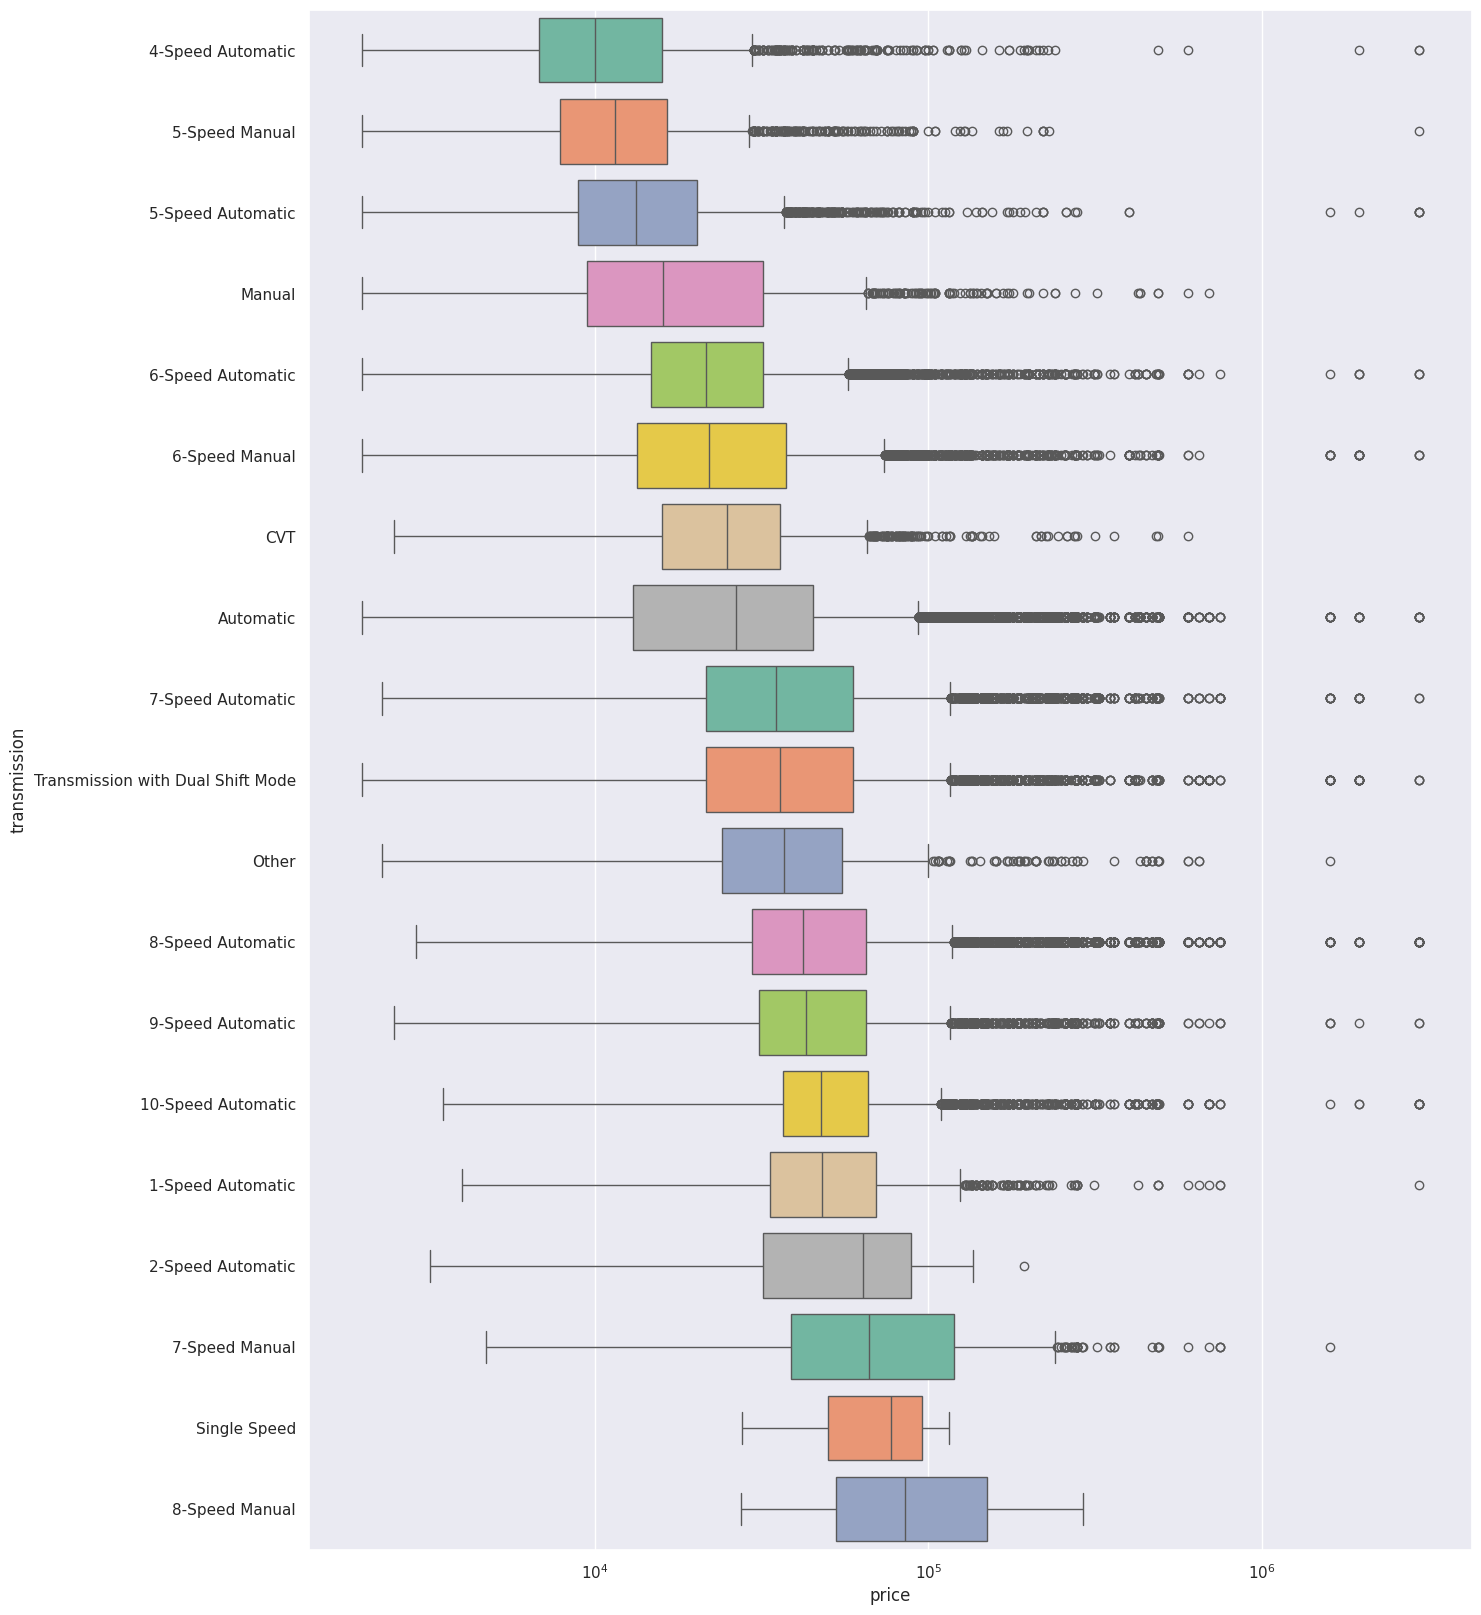

In [ ]:
sns.set(rc={'figure.figsize': (15, 20)})
median_price_order = train_data.groupby('transmission')['price'].median().sort_values().index
sns.boxplot(y=train_data['transmission'], x=train_data['price'], palette='Set2',
           order=median_price_order)
plt.xscale('log')

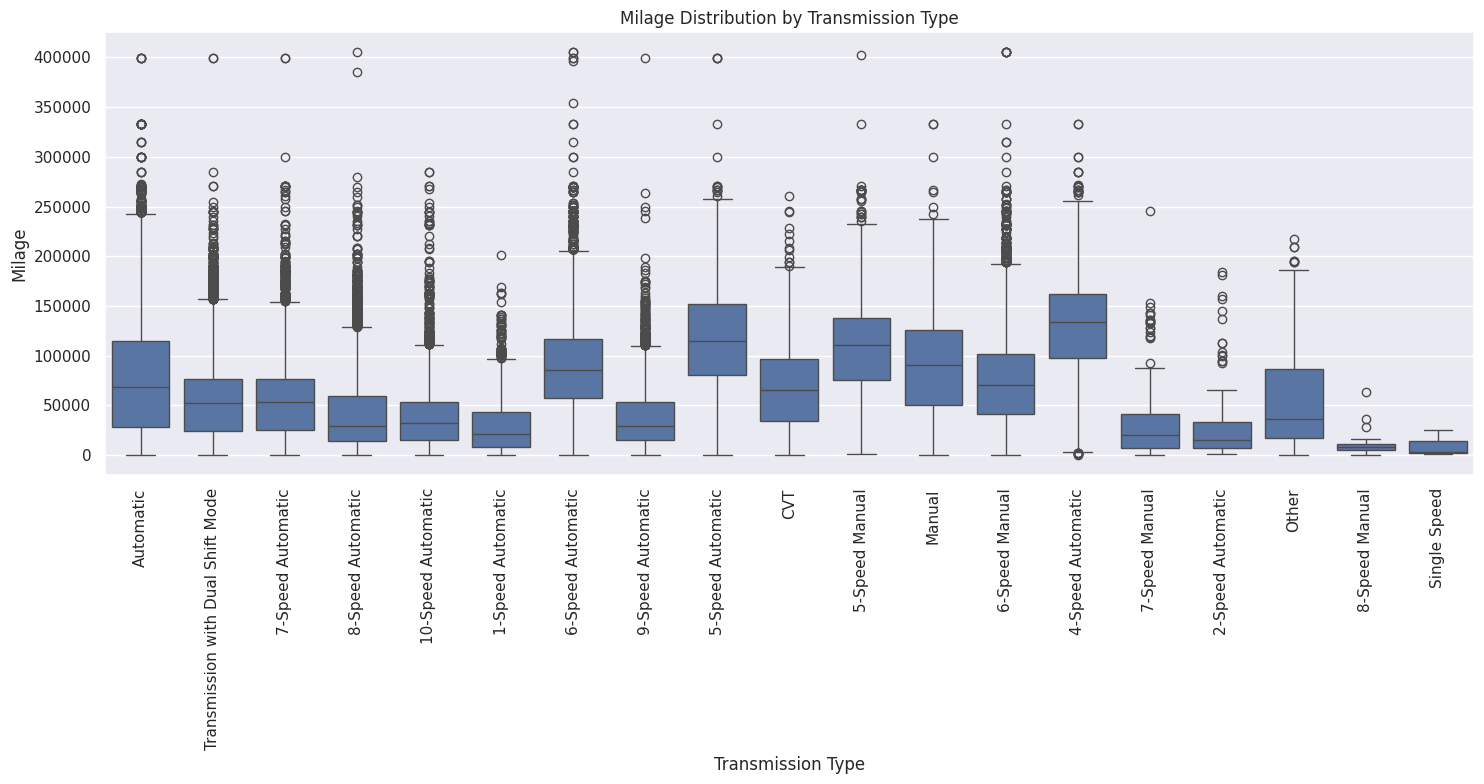

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=train_data, x='transmission', y='milage')
plt.title('Milage Distribution by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Milage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

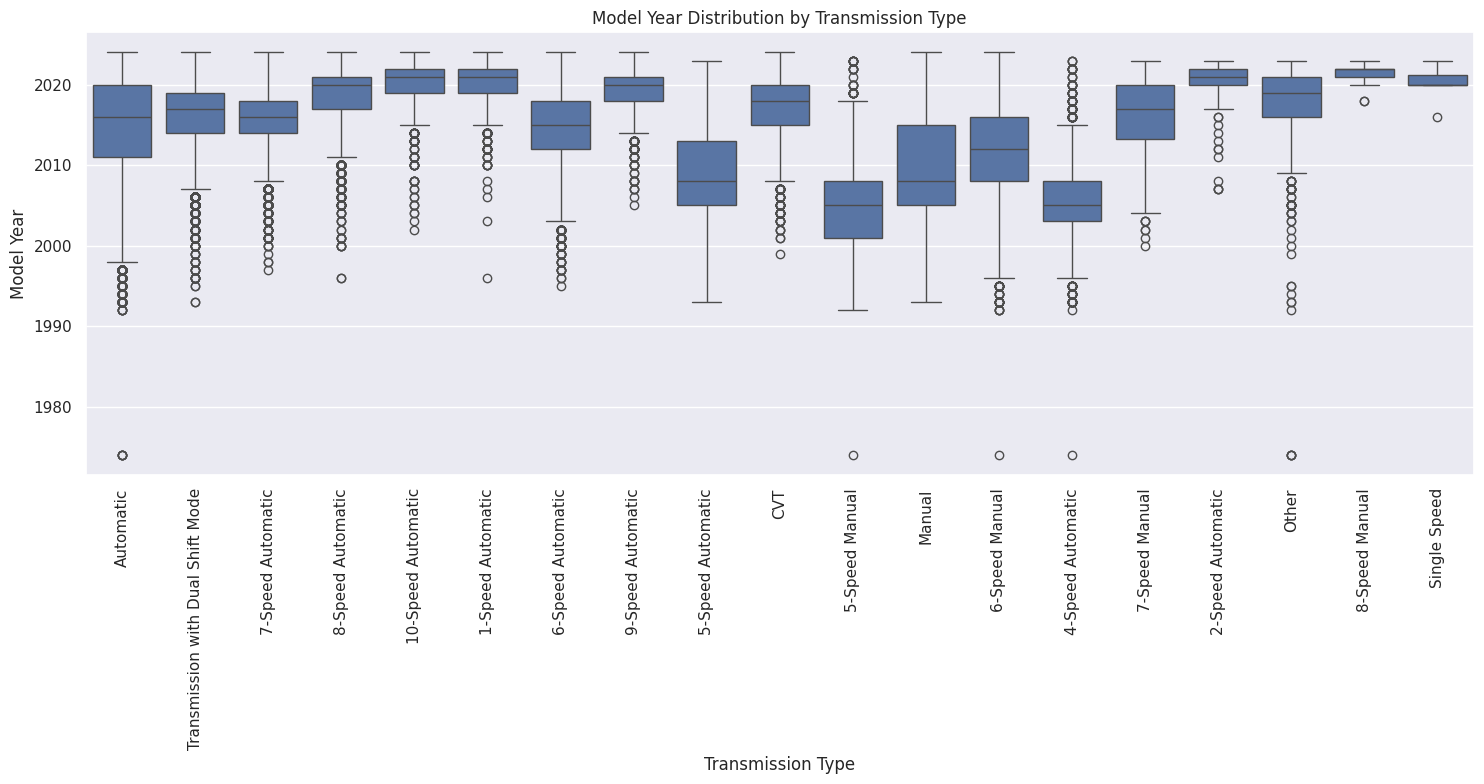

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=train_data, x='transmission', y='model_year')
plt.title('Model Year Distribution by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Model Year')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

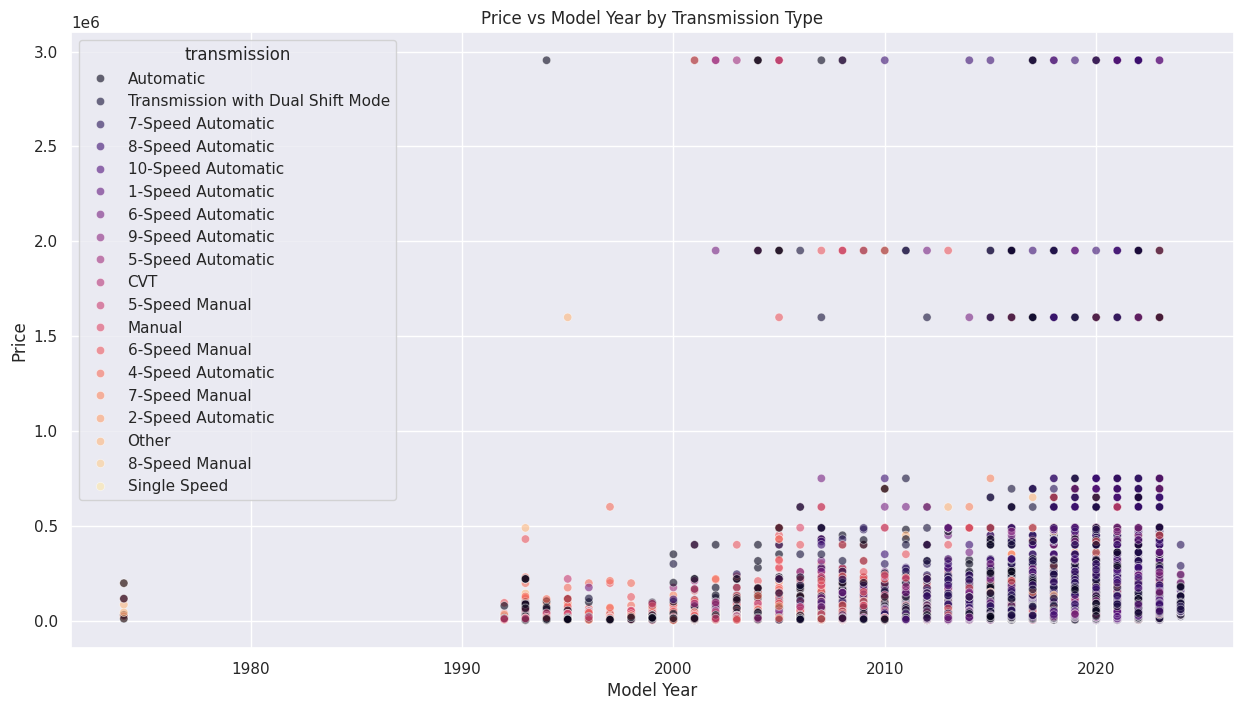

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=train_data, x='model_year', y='price', hue='transmission', alpha=0.6, palette='magma')
plt.title('Price vs Model Year by Transmission Type')
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.show()

In [ ]:
train_data['model_year'].max()

2024

For me, there was not much noticeable reduction in the CV score(rmse) when i added 'age' features to the data

In [ ]:
# get the oldest car by subtracting model_year from it's highest value/year
train_max_year = train_data['model_year'].max()
test_max_year = test_data['model_year'].max()

train_data['car_age'] = train_max_year - train_data['model_year']
test_data['car_age'] = test_max_year - test_data['model_year']

In [ ]:
train_data

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,car_age
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,Automatic,Yellow,Gray,None reported,Yes,4200,17
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,Automatic,Silver,Beige,At least 1 accident or damage reported,Yes,4999,22
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,Automatic,Blue,Gray,None reported,Yes,13900,22
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission with Dual Shift Mode,Black,Black,None reported,Yes,45000,7
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed Automatic,Black,Beige,None reported,Yes,97500,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission with Dual Shift Mode,White,Beige,None reported,Yes,27500,7
188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed Automatic,White,Black,At least 1 accident or damage reported,Yes,30000,6
188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed Automatic,White,Black,None reported,Yes,86900,3
188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,No,84900,2


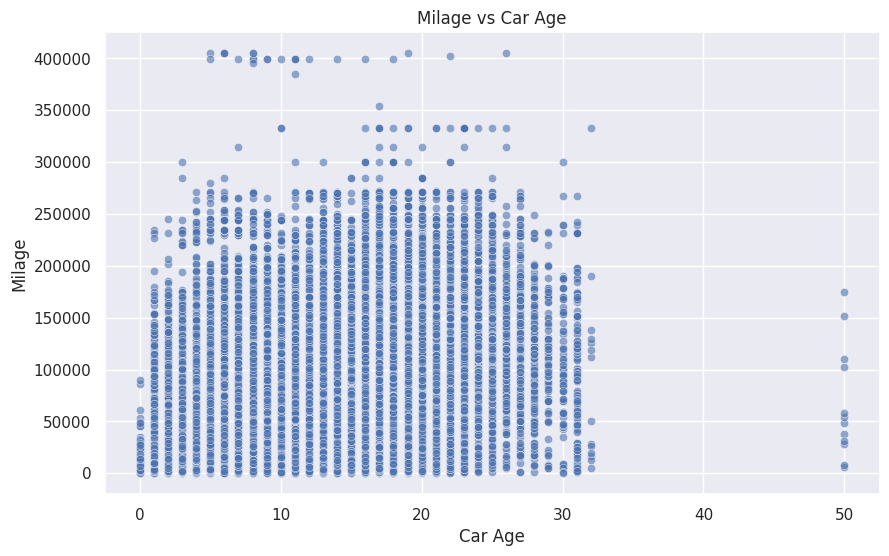

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x='car_age', y='milage', alpha=0.6)
plt.title('Milage vs Car Age')
plt.xlabel('Car Age')
plt.ylabel('Milage')
plt.show()

In [ ]:
train_data['car_age']

,car_age
0,17
1,22
2,22
3,7
4,3
...,...
188528,7
188529,6
188530,3
188531,2


In [ ]:
old_cars = train_data[train_data['car_age'] > 30]
display(old_cars)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,car_age
1741,Chevrolet,Protege DX,1993,94200,–,–,Automatic,Red,Gray,None reported,Yes,7599,31
1802,Ford,Bronco XLT,1993,195000,–,–,Automatic,Blue,Gray,None reported,Yes,6099,31
2967,Toyota,Land Cruiser Base,1993,47000,–,–,4-Speed Automatic,Blue,Gray,None reported,Yes,26600,31
8173,Dodge,Challenger R/T Scat Pack,1974,49000,–,–,5-Speed Manual,Green,Gray,None reported,Yes,29900,50
9063,Volkswagen,Jetta GLX VR6,1993,1585,–,–,Other,Arctic White,Gray,None reported,No,142998,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179545,Mazda,MX-5 Miata Base,1992,130000,Gasoline,140.0HP 1.8L 4 Cylinder Engine Gasoline Fuel,5-Speed Manual,Blue,Beige,None reported,Yes,8300,32
186100,BMW,740 iL,1993,242000,Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,Automatic,Silver,Black,None reported,Yes,6730,31
187399,Mazda,MX-5 Miata Base,1993,90200,–,–,5-Speed Manual,Gray,Black,At least 1 accident or damage reported,Yes,11500,31
187664,Mercedes-Benz,SLS AMG Base,1993,14586,–,–,Automatic,Red,Silver,None reported,Yes,65000,31


In [ ]:
ext_unique_tr = train_data['ext_col'].unique()
int_unique_tr = train_data['int_col'].unique()
# brand_unique_te = test_data['brand'].unique()
diff = []

for col in ext_unique_tr:
    if col in int_unique_tr:
        continue
    else:
        ext_unique.append(col)
print(ext_unique)

# # Select rows in train_data where the 'brand' is in ext_unique
# train_data_ext_brands = train_data[train_data['brand'].isin(ext_unique)]
# display(train_data_ext_brands)

['smart', 'Polestar', 'Snowflake White Pearl Metallic', 'Santorini Black Metallic', 'Purple', 'Ebony Twilight Metallic', 'Magnetite Black Metallic', 'Diamond Black', 'Vega Blue', 'Platinum White Pearl', 'Metallic', 'White Frost Tri-Coat', 'Firecracker Red Clearcoat', 'Phytonic Blue Metallic', 'Blu', 'Brilliant Silver Metallic', 'Black Raven', 'Black Clearcoat', 'Firenze Red', 'Agate Black Metallic', 'Glacial White Pearl', 'Majestic Plum Metallic', 'designo Diamond White Metallic', 'Oxford White', 'Black Sapphire Metallic', 'Mythos Black', 'Granite Crystal Clearcoat Metallic', 'White Diamond Tri-Coat', 'Magnetite Gray Metallic', 'Carpathian Grey Premium Metallic', 'designo Diamond White Bright', 'Phantom Black Pearl Effect / Black Roof', 'Nebula Gray Pearl', 'Deep Crystal Blue Mica', 'Flame Red Clearcoat', 'Lunar Blue Metallic', 'Bright White Clearcoat', 'Rapid Red Metallic Tinted Clearcoat', 'Caviar', 'Dark Ash Metallic', 'Velvet Red Pearlcoat', 'Silver Zynith', 'Super Black', 'Antimat

In [ ]:
train_data['ext_col'].unique()

array(['Yellow', 'Silver', 'Blue', 'Black', 'White',
       'Snowflake White Pearl Metallic', 'Gray', 'Green',
       'Santorini Black Metallic', 'Purple', 'Ebony Twilight Metallic',
       'Red', 'Magnetite Black Metallic', 'Diamond Black', 'Vega Blue',
       'Beige', 'Gold', 'Platinum White Pearl', 'Metallic',
       'White Frost Tri-Coat', 'Firecracker Red Clearcoat',
       'Phytonic Blue Metallic', 'Blu', 'Orange', 'Brown',
       'Brilliant Silver Metallic', 'Black Raven', 'Black Clearcoat',
       'Firenze Red', 'Agate Black Metallic', 'Glacial White Pearl',
       'Majestic Plum Metallic', 'designo Diamond White Metallic',
       'Oxford White', 'Black Sapphire Metallic', 'Mythos Black',
       'Granite Crystal Clearcoat Metallic', 'White Diamond Tri-Coat',
       'Magnetite Gray Metallic', 'Carpathian Grey Premium Metallic',
       'designo Diamond White Bright',
       'Phantom Black Pearl Effect / Black Roof', 'Nebula Gray Pearl',
       'Deep Crystal Blue Mica', 'Flame Red

Upon applying the below function to the data, neither did it bring about a noticeable reduction in CV score nor did it result in a drastic increase in CV score

In [ ]:
# categorize the unique values in color to any color in it's family
def color_type(color):
    color = color.lower()

    if any(x in color for x in ['ivory', 'frost', 'white', 'pearl']):
        return 'White'
    elif any(x in color for x in ['steel', 'grey', 'gray', 'silver', 'graphite']): return 'Silver'
    elif any(x in color for x in ['aqua', 'navy', 'blue', 'teal', 'cloud']): return 'Blue'
    elif any(x in color for x in ['gold', 'yellow', 'orange']): return 'Yellow'
    elif any(x in color for x in ['raven', 'onyx', 'obsidian', 'black', 'ebony', 'nero']): return 'Black'
    elif any(x in color for x in ['ruby', 'red', 'garnet', 'pink']): return 'Red'
    elif any(x in color for x in ['green']): return 'Green'
    elif any(x in color for x in ['beige', 'brown', 'sandstone', 'tan', 'parchment', 'stone']): return 'Brown'
    else:
        return 'Other'

In [ ]:
color = train_data['int_col'].value_counts()
color[:30]

,count
int_col,
Black,107674
Beige,24495
Gray,21204
Brown,5810
Red,5145
White,4743
–,4527
Jet Black,2398
Ebony,1833


In [ ]:
train_data

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,car_age
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,Automatic,Yellow,Gray,None reported,Yes,4200,17
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,Automatic,Silver,Beige,At least 1 accident or damage reported,Yes,4999,22
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,Automatic,Blue,Gray,None reported,Yes,13900,22
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission with Dual Shift Mode,Black,Black,None reported,Yes,45000,7
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed Automatic,Black,Beige,None reported,Yes,97500,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission with Dual Shift Mode,White,Beige,None reported,Yes,27500,7
188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed Automatic,White,Black,At least 1 accident or damage reported,Yes,30000,6
188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed Automatic,White,Black,None reported,Yes,86900,3
188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,No,84900,2


In [ ]:
years = train_data[train_data['model_year'] == 2024]
display(years)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,car_age
5570,Lexus,NX 300h Base,2024,16425,Hybrid,2.5L I4 16V MPFI DOHC Hybrid,CVT,Black,Gray,None reported,Yes,44700,0
6143,BMW,330 i xDrive,2024,8700,Gasoline,255.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,Automatic,Blue,White,None reported,Yes,33000,0
7164,BMW,M3 CS,2024,31850,Gasoline,543.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission with Dual Shift Mode,Black,Black,None reported,Yes,22550,0
7227,Ford,Expedition Timberline,2024,23300,Gasoline,440.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed Automatic,Gray,Black,None reported,Yes,69500,0
7413,BMW,M3 CS,2024,34254,Gasoline,543.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission with Dual Shift Mode,White,Black,None reported,Yes,63900,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178467,BMW,M3 CS,2024,3415,Gasoline,543.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Automatic,Black,Black,None reported,Yes,179900,0
180713,BMW,M3 CS,2024,48200,Gasoline,543.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission with Dual Shift Mode,Black,Black,None reported,Yes,67000,0
184683,RAM,1500 Big Horn,2024,18385,Gasoline,395.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,8-Speed Automatic,White,Black,None reported,Yes,57000,0
185471,INFINITI,QX56 Base,2024,7100,Gasoline,400.0HP 5.6L 8 Cylinder Engine Gasoline Fuel,7-Speed Automatic,Black,Black,None reported,Yes,74900,0


In [ ]:
# Calculate milage per year
train_data['milage_per_year'] = train_data.apply(lambda row: row['milage'] / row['car_age'] if row['car_age'] > 0 else 0, axis=1)
test_data['milage_per_year'] = test_data.apply(lambda row: row['milage'] / row['car_age'] if row['car_age'] > 0 else 0, axis=1)

display(train_data[['milage', 'car_age', 'milage_per_year', 'price']].head())
display(test_data[['milage', 'car_age', 'milage_per_year']].head())

,milage,car_age,milage_per_year,price
0,213000,17,12529.411765,4200
1,143250,22,6511.363636,4999
2,136731,22,6215.045455,13900
3,19500,7,2785.714286,45000
4,7388,3,2462.666667,97500


,milage,car_age,milage_per_year
0,98000,9,10888.888889
1,9142,4,2285.500000
2,28121,2,14060.500000
3,61258,8,7657.250000
4,59000,6,9833.333333


In [ ]:
years = train_data[train_data['model_year'] == 2024]
display(years)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,car_age,milage_per_year
5570,Lexus,NX 300h Base,2024,16425,Hybrid,2.5L I4 16V MPFI DOHC Hybrid,CVT,Black,Gray,None reported,Yes,44700,0,0.0
6143,BMW,330 i xDrive,2024,8700,Gasoline,255.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,Automatic,Blue,White,None reported,Yes,33000,0,0.0
7164,BMW,M3 CS,2024,31850,Gasoline,543.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission with Dual Shift Mode,Black,Black,None reported,Yes,22550,0,0.0
7227,Ford,Expedition Timberline,2024,23300,Gasoline,440.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed Automatic,Gray,Black,None reported,Yes,69500,0,0.0
7413,BMW,M3 CS,2024,34254,Gasoline,543.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission with Dual Shift Mode,White,Black,None reported,Yes,63900,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178467,BMW,M3 CS,2024,3415,Gasoline,543.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Automatic,Black,Black,None reported,Yes,179900,0,0.0
180713,BMW,M3 CS,2024,48200,Gasoline,543.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission with Dual Shift Mode,Black,Black,None reported,Yes,67000,0,0.0
184683,RAM,1500 Big Horn,2024,18385,Gasoline,395.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,8-Speed Automatic,White,Black,None reported,Yes,57000,0,0.0
185471,INFINITI,QX56 Base,2024,7100,Gasoline,400.0HP 5.6L 8 Cylinder Engine Gasoline Fuel,7-Speed Automatic,Black,Black,None reported,Yes,74900,0,0.0


In [ ]:
train_data

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,car_age,milage_per_year
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,Automatic,Yellow,Gray,None reported,Yes,4200,17,12529.411765
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,Automatic,Silver,Beige,At least 1 accident or damage reported,Yes,4999,22,6511.363636
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,Automatic,Blue,Gray,None reported,Yes,13900,22,6215.045455
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission with Dual Shift Mode,Black,Black,None reported,Yes,45000,7,2785.714286
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed Automatic,Black,Beige,None reported,Yes,97500,3,2462.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission with Dual Shift Mode,White,Beige,None reported,Yes,27500,7,7000.000000
188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed Automatic,White,Black,At least 1 accident or damage reported,Yes,30000,6,4766.666667
188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed Automatic,White,Black,None reported,Yes,86900,3,4550.000000
188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,No,84900,2,6947.500000


In [ ]:
# def year_title(data):


In [ ]:
train_data['accident'].unique()

array(['None reported', 'At least 1 accident or damage reported',
       'Unknown'], dtype=object)